<a href="https://colab.research.google.com/github/PriyanshuAgarwal27/Projects/blob/main/Project_covid_vaccine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
upload=files.upload()


Saving hospitalProject.csv.xlsx to hospitalProject.csv.xlsx


In [3]:
import os
os.listdir()

['.config', 'hospitalProject.csv.xlsx', 'sample_data']

In [4]:
import pandas as pd
import numpy as np
df=pd.read_excel("hospitalProject.csv.xlsx")
df = df.replace(0, np.nan)
df = df.dropna(how='all', axis=0)
df = df.replace(np.nan, 0)
df.head()


,Sr No.,District,Hospital Details,Unnamed: 3,Unnamed: 4,Fee Regulated Beds,Total Allocated Bed Capacity for Covid-19,Allocated Bed for Isolation without Oxygen,Vacant Bed of Isolation without Oxygen,Allocated Isolation with Oxygen,Vacant Isolation with Oxygen,Allocated Bed for ICU Without Ventilator,Vacant Bed of ICU Without Ventilator,Allocated of ICU Beds With Ventilator,Vacant ICU Beds With Ventilator,Unnamed: 15,Unnamed: 16,Address
0,1.0,Pune,Army Institute of Cardithorasic Sciences AICTS,0,0,0.0,400.0,350.0,226.0,0.0,0.0,30.0,7.0,20.0,5.0,0.0,0.0,Kondhwa
3,2.0,Pune,Aundh - baner DCH,0,0,0.0,287.0,0.0,0.0,250.0,76.0,22.0,14.0,15.0,7.0,0.0,0.0,baner rd
7,3.0,Pune,COEP Jumbo Hospital,0,0,0.0,600.0,0.0,0.0,435.0,40.0,135.0,20.0,30.0,2.0,0.0,0.0,Shivaji Nagar
11,4.0,Pune,Sasoon,0,0,0.0,510.0,0.0,0.0,382.0,331.0,38.0,31.0,90.0,42.0,0.0,0.0,Agarkar Nagar
15,5.0,Pune,Dalvi Hospital,0,0,0.0,90.0,0.0,0.0,80.0,58.0,0.0,0.0,10.0,0.0,0.0,0.0,Shivajinagar


In [5]:
d=df
sum=d["Allocated Isolation with Oxygen"]+d["Allocated of ICU Beds With Ventilator"]
d["Percent of beds filled"]=(sum/d["Total Allocated Bed Capacity for Covid-19"])*100
d.drop(["Allocated Bed for Isolation without Oxygen","Vacant Bed of Isolation without Oxygen","Allocated Isolation with Oxygen","Vacant Isolation with Oxygen","Allocated Bed for ICU Without Ventilator","Vacant Bed of ICU Without Ventilator","Allocated of ICU Beds With Ventilator","Vacant ICU Beds With Ventilator"],axis=1,inplace=True)

d.head()

,Sr No.,District,Hospital Details,Unnamed: 3,Unnamed: 4,Fee Regulated Beds,Total Allocated Bed Capacity for Covid-19,Unnamed: 15,Unnamed: 16,Address,Percent of beds filled
0,1.0,Pune,Army Institute of Cardithorasic Sciences AICTS,0,0,0.0,400.0,0.0,0.0,Kondhwa,5.000000
3,2.0,Pune,Aundh - baner DCH,0,0,0.0,287.0,0.0,0.0,baner rd,92.334495
7,3.0,Pune,COEP Jumbo Hospital,0,0,0.0,600.0,0.0,0.0,Shivaji Nagar,77.500000
11,4.0,Pune,Sasoon,0,0,0.0,510.0,0.0,0.0,Agarkar Nagar,92.549020
15,5.0,Pune,Dalvi Hospital,0,0,0.0,90.0,0.0,0.0,Shivajinagar,100.000000


In [6]:
d.head()

,Sr No.,District,Hospital Details,Unnamed: 3,Unnamed: 4,Fee Regulated Beds,Total Allocated Bed Capacity for Covid-19,Unnamed: 15,Unnamed: 16,Address,Percent of beds filled
0,1.0,Pune,Army Institute of Cardithorasic Sciences AICTS,0,0,0.0,400.0,0.0,0.0,Kondhwa,5.000000
3,2.0,Pune,Aundh - baner DCH,0,0,0.0,287.0,0.0,0.0,baner rd,92.334495
7,3.0,Pune,COEP Jumbo Hospital,0,0,0.0,600.0,0.0,0.0,Shivaji Nagar,77.500000
11,4.0,Pune,Sasoon,0,0,0.0,510.0,0.0,0.0,Agarkar Nagar,92.549020
15,5.0,Pune,Dalvi Hospital,0,0,0.0,90.0,0.0,0.0,Shivajinagar,100.000000


In [7]:
from geopy.geocoders import  Nominatim
from geopy.exc import GeocoderTimedOut

In [ ]:
nom = Nominatim()

In [10]:
from geopy.extra.rate_limiter import RateLimiter
geocode = RateLimiter(nom.geocode, min_delay_seconds=1)

In [ ]:
d["Coordinates"]=d["Address"].apply(geocode)
d.head()


In [33]:
d["latitude"]=d.Coordinates.apply(lambda x: x.latitude if x!=None else None)

d.head()

,Sr No.,District,Hospital Details,Total Allocated Bed Capacity for Covid-19,Address,Percent of beds filled,Coordinates,latitude
0,1.0,Pune,Army Institute of Cardithorasic Sciences AICTS,400.0,Kondhwa,5.000000,"(Kondhwa, Pune City, Pune District, Maharashtr...",18.477991
1,2.0,Pune,Aundh - baner DCH,287.0,baner rd,92.334495,"(Gopal Hari Deshmukh Marg, Madhavbaug Society,...",18.562228
2,3.0,Pune,COEP Jumbo Hospital,600.0,Shivaji Nagar,77.500000,"(Shivaji Nagar, Samastipur, Bihar, India, (25....",25.884554
3,4.0,Pune,Sasoon,510.0,Agarkar Nagar,92.549020,"(Agarkar Mala Road, Maliwada Ganpati, Ahmadnag...",19.080140
4,5.0,Pune,Dalvi Hospital,90.0,Shivajinagar,100.000000,"(Shivajinagar, Shivajinagar Road, Shivajinagar...",18.532249


In [ ]:
d["longitude"]=d.Coordinates.apply(lambda x:x.longitude if x!=None else None)
d

In [ ]:
d.head()

In [39]:
d.dropna(axis=0, how='any', thresh=None, subset=['latitude','longitude'], inplace=True)
d

,Sr No.,District,Hospital Details,Total Allocated Bed Capacity for Covid-19,Address,Percent of beds filled,Coordinates,latitude,longitude
0,1.0,Pune,Army Institute of Cardithorasic Sciences AICTS,400.0,Kondhwa,5.000000,"(Kondhwa, Pune City, Pune District, Maharashtr...",18.477991,73.894063
1,2.0,Pune,Aundh - baner DCH,287.0,baner rd,92.334495,"(Gopal Hari Deshmukh Marg, Madhavbaug Society,...",18.562228,73.784067
2,3.0,Pune,COEP Jumbo Hospital,600.0,Shivaji Nagar,77.500000,"(Shivaji Nagar, Samastipur, Bihar, India, (25....",25.884554,86.039850
3,4.0,Pune,Sasoon,510.0,Agarkar Nagar,92.549020,"(Agarkar Mala Road, Maliwada Ganpati, Ahmadnag...",19.080140,74.724343
4,5.0,Pune,Dalvi Hospital,90.0,Shivajinagar,100.000000,"(Shivajinagar, Shivajinagar Road, Shivajinagar...",18.532249,73.849960
...,...,...,...,...,...,...,...,...,...
248,247.0,Pune,Khadki Contonment Hospital,0.0,Khadki,NaN,"(Khadki, Mohadi Taluka, Bhandara District, Mah...",21.228095,79.783530
249,248.0,Pune,Military Hospital Khadki,0.0,Range Hills,NaN,"(Range, Orange Road, Laurentian Hills, Renfrew...",45.928134,-77.571906
250,249.0,Pune,Khadki Sports Complex,20.0,Khadki,0.000000,"(Khadki, Mohadi Taluka, Bhandara District, Mah...",21.228095,79.783530
251,250.0,Pune,Mahadaji Shinde High school,90.0,pune,0.000000,"(Pune City, Pune District, Maharashtra, India,...",18.521428,73.854454


In [40]:
import folium
from folium.plugins import FastMarkerCluster
import matplotlib.pyplot as plt

m= folium.Map(
    location=[18.5204, 73.8567],
    zoom_start=4.4,tiles='Stamen Toner')
#FastMarkerCluster(data[['latitudes', 'longitudes']].values.tolist()).add_to(m)
folium.LayerControl().add_to(m)

for row in d.iterrows():
    row=row[1]
    folium.CircleMarker(location=(row["latitude"],
                                  row["longitude"]),
                        radius= row['Total Allocated Bed Capacity for Covid-19']/198,
                        color="#007849",
                        popup=row['Hospital Details'],
                        fill=False).add_to(m)


# save the map 
#m.save("save_file.html")
    
display(m)


In [41]:
!pip install haversine

In [42]:
!pip install plotly

In [43]:
import plotly.graph_objects as go

d['text'] = d['Hospital Details'] +'Total Cases:'+ d['Total Allocated Bed Capacity for Covid-19'].astype(str)

fig = go.Figure(data=go.Scattergeo(
        #locations = ["India"],
        locationmode = 'ISO-3',
        lon = d['longitude'],
        lat = d['latitude'],
        text = d['text'],
        mode = 'markers',
        marker = dict(
            size = d['Total Allocated Bed Capacity for Covid-19']/198,
            opacity = 0.8,
            reversescale=True,
            autocolorscale = False,
            symbol = 'triangle-up-open',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = d['Total Allocated Bed Capacity for Covid-19'],
            cmax = d['Total Allocated Bed Capacity for Covid-19'].max(),
            colorbar_title="Total Covid 19 cases<br>count per bounty"
        )))

fig.update_layout(
        title = 'Hospitals location in India<br>(Hover for Hospital names)',
        geo = dict(
            scope='asia',
            projection_type='equirectangular',
            showland = True
        ),
    )
fig.show()

In [44]:

d.reset_index(inplace=True)
d.head()

,index,Sr No.,District,Hospital Details,Total Allocated Bed Capacity for Covid-19,Address,Percent of beds filled,Coordinates,latitude,longitude,text
0,0,1.0,Pune,Army Institute of Cardithorasic Sciences AICTS,400.0,Kondhwa,5.000000,"(Kondhwa, Pune City, Pune District, Maharashtr...",18.477991,73.894063,Army Institute of Cardithorasic Sciences AICTS...
1,1,2.0,Pune,Aundh - baner DCH,287.0,baner rd,92.334495,"(Gopal Hari Deshmukh Marg, Madhavbaug Society,...",18.562228,73.784067,Aundh - baner DCHTotal Cases:287.0
2,2,3.0,Pune,COEP Jumbo Hospital,600.0,Shivaji Nagar,77.500000,"(Shivaji Nagar, Samastipur, Bihar, India, (25....",25.884554,86.039850,COEP Jumbo HospitalTotal Cases:600.0
3,3,4.0,Pune,Sasoon,510.0,Agarkar Nagar,92.549020,"(Agarkar Mala Road, Maliwada Ganpati, Ahmadnag...",19.080140,74.724343,SasoonTotal Cases:510.0
4,4,5.0,Pune,Dalvi Hospital,90.0,Shivajinagar,100.000000,"(Shivajinagar, Shivajinagar Road, Shivajinagar...",18.532249,73.849960,Dalvi HospitalTotal Cases:90.0


In [47]:

d.drop(["index"],axis=1,inplace=True)
d.head()

,Sr No.,District,Hospital Details,Total Allocated Bed Capacity for Covid-19,Address,Percent of beds filled,Coordinates,latitude,longitude,text
0,1.0,Pune,Army Institute of Cardithorasic Sciences AICTS,400.0,Kondhwa,5.000000,"(Kondhwa, Pune City, Pune District, Maharashtr...",18.477991,73.894063,Army Institute of Cardithorasic Sciences AICTS...
1,2.0,Pune,Aundh - baner DCH,287.0,baner rd,92.334495,"(Gopal Hari Deshmukh Marg, Madhavbaug Society,...",18.562228,73.784067,Aundh - baner DCHTotal Cases:287.0
2,3.0,Pune,COEP Jumbo Hospital,600.0,Shivaji Nagar,77.500000,"(Shivaji Nagar, Samastipur, Bihar, India, (25....",25.884554,86.039850,COEP Jumbo HospitalTotal Cases:600.0
3,4.0,Pune,Sasoon,510.0,Agarkar Nagar,92.549020,"(Agarkar Mala Road, Maliwada Ganpati, Ahmadnag...",19.080140,74.724343,SasoonTotal Cases:510.0
4,5.0,Pune,Dalvi Hospital,90.0,Shivajinagar,100.000000,"(Shivajinagar, Shivajinagar Road, Shivajinagar...",18.532249,73.849960,Dalvi HospitalTotal Cases:90.0


In [48]:
d.drop(["Sr No."],axis=1,inplace=True)
d.head()

,District,Hospital Details,Total Allocated Bed Capacity for Covid-19,Address,Percent of beds filled,Coordinates,latitude,longitude,text
0,Pune,Army Institute of Cardithorasic Sciences AICTS,400.0,Kondhwa,5.000000,"(Kondhwa, Pune City, Pune District, Maharashtr...",18.477991,73.894063,Army Institute of Cardithorasic Sciences AICTS...
1,Pune,Aundh - baner DCH,287.0,baner rd,92.334495,"(Gopal Hari Deshmukh Marg, Madhavbaug Society,...",18.562228,73.784067,Aundh - baner DCHTotal Cases:287.0
2,Pune,COEP Jumbo Hospital,600.0,Shivaji Nagar,77.500000,"(Shivaji Nagar, Samastipur, Bihar, India, (25....",25.884554,86.039850,COEP Jumbo HospitalTotal Cases:600.0
3,Pune,Sasoon,510.0,Agarkar Nagar,92.549020,"(Agarkar Mala Road, Maliwada Ganpati, Ahmadnag...",19.080140,74.724343,SasoonTotal Cases:510.0
4,Pune,Dalvi Hospital,90.0,Shivajinagar,100.000000,"(Shivajinagar, Shivajinagar Road, Shivajinagar...",18.532249,73.849960,Dalvi HospitalTotal Cases:90.0


In [51]:
len(d)

197

In [72]:
import random
k = 4
random.seed(42)
#run it
clusters,centroids,elbow=kmeans(vals,k)
#output
d['c']=[int(c) for c in clusters]
lats = [centroids[i][1] for i in range(k)]
d['clat'] = d['c'].map(lambda x: lats[x])
longs = [centroids[i][2] for i in range(k)]
d['clong'] = d['c'].map(lambda x: longs[x])
#d['Count']= d.groupby('c')['Facility_Name'].nunique()
d.head()
d

,District,Hospital Details,Total Allocated Bed Capacity for Covid-19,Address,Percent of beds filled,Coordinates,latitude,longitude,text,c,clat,clong
0,Pune,Army Institute of Cardithorasic Sciences AICTS,400.0,Kondhwa,5.000000,"(Kondhwa, Pune City, Pune District, Maharashtr...",18.477991,73.894063,Army Institute of Cardithorasic Sciences AICTS...,1,19.111155,73.467793
1,Pune,Aundh - baner DCH,287.0,baner rd,92.334495,"(Gopal Hari Deshmukh Marg, Madhavbaug Society,...",18.562228,73.784067,Aundh - baner DCHTotal Cases:287.0,1,19.111155,73.467793
2,Pune,COEP Jumbo Hospital,600.0,Shivaji Nagar,77.500000,"(Shivaji Nagar, Samastipur, Bihar, India, (25....",25.884554,86.039850,COEP Jumbo HospitalTotal Cases:600.0,3,24.648824,80.961509
3,Pune,Sasoon,510.0,Agarkar Nagar,92.549020,"(Agarkar Mala Road, Maliwada Ganpati, Ahmadnag...",19.080140,74.724343,SasoonTotal Cases:510.0,1,19.111155,73.467793
4,Pune,Dalvi Hospital,90.0,Shivajinagar,100.000000,"(Shivajinagar, Shivajinagar Road, Shivajinagar...",18.532249,73.849960,Dalvi HospitalTotal Cases:90.0,1,19.111155,73.467793
...,...,...,...,...,...,...,...,...,...,...,...,...
192,Pune,Khadki Contonment Hospital,0.0,Khadki,NaN,"(Khadki, Mohadi Taluka, Bhandara District, Mah...",21.228095,79.783530,Khadki Contonment HospitalTotal Cases:0.0,3,24.648824,80.961509
193,Pune,Military Hospital Khadki,0.0,Range Hills,NaN,"(Range, Orange Road, Laurentian Hills, Renfrew...",45.928134,-77.571906,Military Hospital KhadkiTotal Cases:0.0,2,42.655720,-86.974341
194,Pune,Khadki Sports Complex,20.0,Khadki,0.000000,"(Khadki, Mohadi Taluka, Bhandara District, Mah...",21.228095,79.783530,Khadki Sports ComplexTotal Cases:20.0,3,24.648824,80.961509
195,Pune,Mahadaji Shinde High school,90.0,pune,0.000000,"(Pune City, Pune District, Maharashtra, India,...",18.521428,73.854454,Mahadaji Shinde High schoolTotal Cases:90.0,1,19.111155,73.467793


In [74]:

c_lat=list(set(d['clat']))
c_long=list(set(d['clong']))
centroids=list(zip(c_lat,c_long))

In [76]:
m2 = folium.Map(
    location=[18.5204, 73.8567],
    zoom_start=4.4)
for i in range(len(centroids)):
    folium.CircleMarker(centroids[i]).add_to(m2)
    
folium.LayerControl().add_to(m2)
m2

In [79]:
x1=d['latitude'].values.tolist()
y1=d['longitude'].values.tolist()

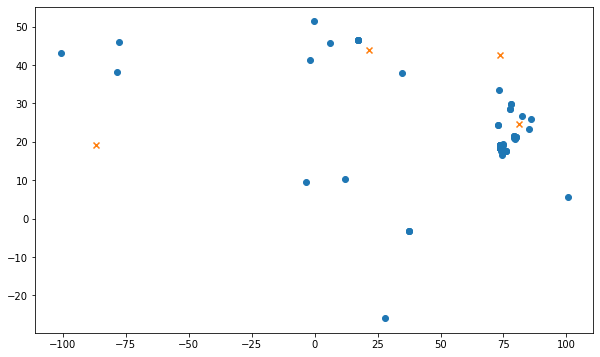

In [80]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.scatter(y1,x1)
plt.scatter(c_long,c_lat,marker='x')